In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import researchpy as rp
import numpy as np

In [4]:
df0 = pd.read_csv('dati_rocce_classified.csv', sep=',', index_col=0)

In [5]:
# data pyr
data = df0[df0.type==3]

In [7]:
rp.codebook(df0[df0.type==3])

Variable: index    Data Type: int64 

 Number of Obs.: 47 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 47 

 Range: [74, 230] 
 Mean: 121.64 
 Standard Deviation: 42.74 
 Mode: 74 
 10th Percentile: 78.6 
 25th Percentile: 85.5 
 50th Percentile: 119.0 
 75th Percentile: 149.0 
 90th Percentile: 179.0 





Variable: name    Data Type: object 

 Number of Obs.: 47 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 47 

 Data Values and Counts: 
 
    Values  Frequency
   B - 10          1
   B - 11          1
   B - 12          1
    B - 7          1
    B - 8          1
    B - 9          1
  BHA-109          1
  BHA-118          1
  BHA-119          1
  BHA-136          1
   BHA-21          1
   BHA-24          1
   BHA-26          1
   BHA-27          1
   BHA-28          1
   BHA-30          1
   BHA-32          1
   BHA-33          1
   BHA-34          1
   BHA-39          1
   BHA-50          1
   BHA-52          1
   BH

In [10]:
df0[df0.type==3].UCS.quantile(0.05)

5.99

In [11]:
# note for small population e.i. n<30 use the t distr
z = stats.norm.ppf(0.975)
z

1.959963984540054

In [18]:
# mu +- z * sigma/radq(n)   
# mu +- z * SE
sigma = df0[df0.type==3].UCS.std()
SE = sigma / np.sqrt(df0[df0.type==3].shape[0])
mu = df0[df0.type==3].UCS.mean()
sigma, SE, mu

(10.449933342338385, 1.5242794381337534, 13.721663829787234)

In [86]:
CI_inf = mu - z * SE
CI_sup = mu + z * SE
CI_inf, CI_sup

(10.734131028670127, 16.70919663090434)

In [96]:
# un altro modo è stimare la curva normale dal fit
# The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

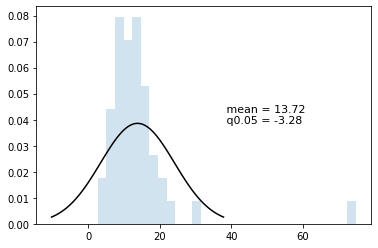

In [19]:
loc,scale = stats.norm.fit(df0[df0.type==3].UCS)
x = np.linspace(stats.norm.ppf(0.01,loc,scale),stats.norm.ppf(0.99,loc,scale),100)
y = stats.norm.pdf(x, loc, scale)
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'k-')
ax.hist(df0[df0.type==3].UCS, density=True, histtype='stepfilled', alpha=0.2, bins=30)
# uso questo altrimenti mi mette a video i valori dell'istogramma
q005 = stats.norm.ppf(0.05,loc,scale).round(2)
mean = stats.norm.ppf(0.5,loc,scale).round(2)
ax.text(x.max()*0.999,y.max()*0.999,f' mean = {mean} \n q0.05 = {q005}', fontsize=11)

plt.show()

#### provo la stima con una funzione lognormale

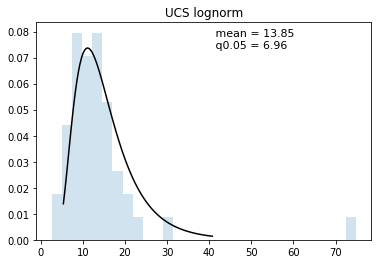

In [20]:
s,loc,scale = stats.lognorm.fit(df0[df0.type==3].UCS)
loc = loc+2
x = np.linspace(stats.lognorm.ppf(0.01,s,loc,scale),stats.lognorm.ppf(0.99,s,loc,scale),100)
y = stats.lognorm.pdf(x, s, loc, scale)
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'k-')
ax.hist(df0[df0.type==3].UCS, density=True, histtype='stepfilled', alpha=0.2, bins=30)
# uso questo altrimenti mi mette a video i valori dell'istogramma
q005 = stats.lognorm.ppf(0.05,s,loc,scale).round(2)
mean = stats.lognorm.ppf(0.5,s,loc,scale).round(2)
ax.text(x.max()*0.999,y.max()*0.999,f' mean = {mean} \n q0.05 = {q005}', fontsize=11)
plt.title('UCS lognorm')
plt.show()

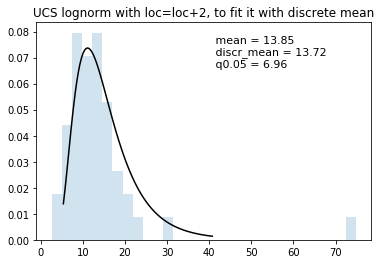

In [21]:
s,loc,scale = stats.lognorm.fit(df0[df0.type==3].UCS)
loc = loc+2
x = np.linspace(stats.lognorm.ppf(0.01,s,loc,scale),stats.lognorm.ppf(0.99,s,loc,scale),100)
y = stats.lognorm.pdf(x, s, loc, scale)
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'k-')
ax.hist(df0[df0.type==3].UCS, density=True, histtype='stepfilled', alpha=0.2, bins=30)
# uso questo altrimenti mi mette a video i valori dell'istogramma
q005 = stats.lognorm.ppf(0.05,s,loc,scale).round(2)
mean = stats.lognorm.ppf(0.5,s,loc,scale).round(2)
discm = round(df0[df0.type==3].UCS.mean(),2)
ax.text(x.max()*0.999,y.max()*0.9,f' mean = {mean} \n discr_mean = {discm} \n q0.05 = {q005}', fontsize=11)
plt.title('UCS lognorm with loc=loc+2, to fit it with discrete mean')
plt.show()

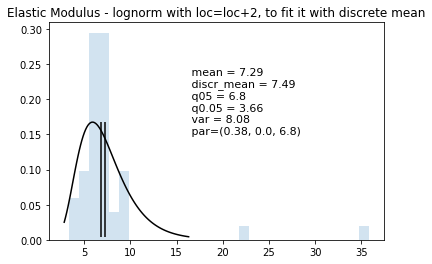

In [22]:
data = df0[df0.type==3].elastic_mod
s,loc,scale = stats.lognorm.fit(data, floc=0)
x = np.linspace(stats.lognorm.ppf(0.01,s,loc,scale),stats.lognorm.ppf(0.99,s,loc,scale),100)
y = stats.lognorm.pdf(x, s, loc, scale)
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'k-')
ax.hist(df0[df0.type==3].elastic_mod, density=True, histtype='stepfilled', alpha=0.2, bins=30)
# uso questo altrimenti mi mette a video i valori dell'istogramma
q005 = stats.lognorm.ppf(0.05,s,loc,scale).round(2)
q05 = stats.lognorm.ppf(0.5,s,loc,scale).round(2)
discm = round(df0[df0.type==3].elastic_mod.mean(),2)
mean = stats.lognorm.mean(s,loc,scale).round(2)
var = stats.lognorm.var(s,loc,scale).round(2)
ax.text(x.max()*0.999,y.max()*0.9,f' mean = {mean} \n discr_mean = {discm} \n q05 = {q05} \n q0.05 = {q005} \n var = {var} \n par={round(s,2),round(loc,2),round(scale,2)}', fontsize=11)
ax.vlines(mean,y.min(),y.max())
ax.vlines(scale,y.min(),y.max())
plt.title('Elastic Modulus - lognorm with loc=loc+2, to fit it with discrete mean')
plt.show()

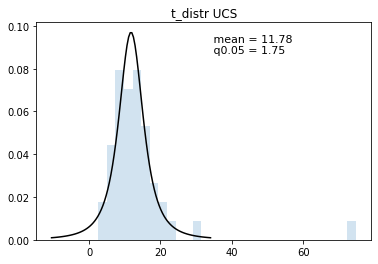

In [24]:
df,loc,scale = stats.t.fit(df0[df0.type==3].UCS)
x = np.linspace(stats.t.ppf(0.01,df,loc,scale),stats.t.ppf(0.99,df,loc,scale),100)
y = stats.t.pdf(x, df, loc, scale)
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'k-')
ax.hist(df0[df0.type==3].UCS, density=True, histtype='stepfilled', alpha=0.2, bins=30)
# uso questo altrimenti mi mette a video i valori dell'istogramma
q005 = stats.t.ppf(0.05,df,loc,scale).round(2)
mean = stats.t.ppf(0.5,df,loc,scale).round(2)
ax.text(x.max()*0.999,y.max()*0.9,f' mean = {mean} \n q0.05 = {q005}', fontsize=11)
plt.title('t_distr UCS')
plt.show()

In [59]:
descr = df0[df0.type==3][['dry_weight','water_cont', 'elastic_mod','UCS','T']].describe().T
stat = rp.summary_cont(df0[df0.type==3][['dry_weight','water_cont', 'elastic_mod','UCS','T']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]','Tensile Strenght [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat4 = stat
stat4

,Group,Variable,N,Mean,SD,SE,95% CI inf,95% CI sup,CV,Min,Max
0,0,Dry weight [kg/m³],47.0,1985.79,210.33,30.68,1924.04,2047.55,0.11,1586.00,2864.00
1,0,Water content [%],47.0,6.04,2.13,0.31,5.41,6.66,0.35,1.00,13.00
2,0,E Young [GPa],47.0,7.49,4.99,0.73,6.03,8.96,0.67,3.30,35.78
3,0,UCS [MPa],47.0,13.72,10.45,1.52,10.65,16.79,0.76,2.60,74.81
4,0,Tensile Strenght [MPa],47.0,2.06,1.06,0.15,1.75,2.37,0.51,0.38,6.18


In [69]:
stats.truncexpon.fit(df0[df0.type==3].UCS)

(1.1690335497121818, -4.180350470723322, 67.56893374888853)

In [72]:
stats.truncexpon.ppf(0.999,loc= 1.1690335497121818, scale=-4.180350470723322, 67.56893374888853)

74.66023871739688